### Assignment 01
### Index No: 190072E
### Name: E.M.D.A. Bandara

In [1]:
import numpy as np
import cv2 as cv

import matplotlib.pyplot as plt
%matplotlib inline


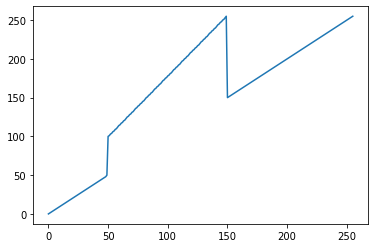

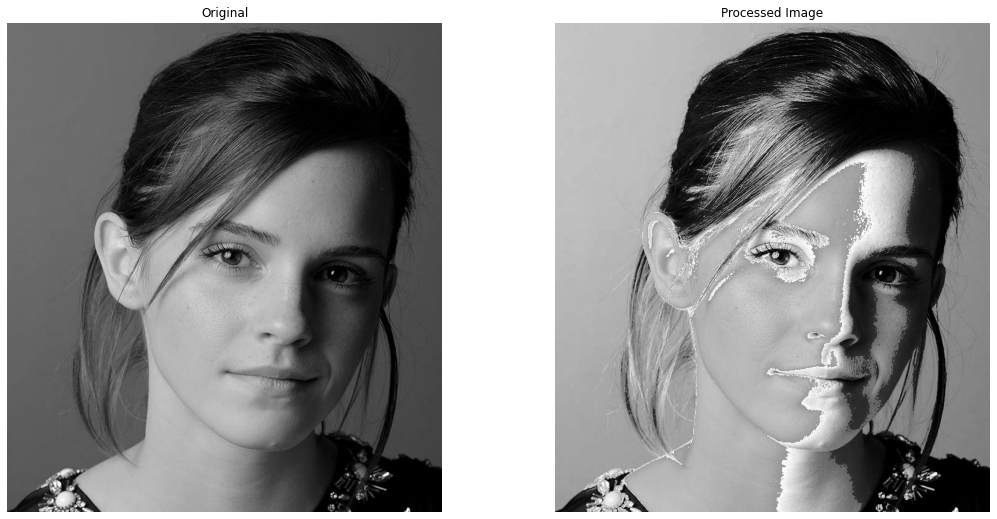

In [2]:
#Quesntion 01
img = cv.imread('images/emma_gray.jpg')
assert img is not None

t_1 = np.linspace(0, 50, 50, endpoint= True)
t_2 = np.linspace(100, 255, 100, endpoint= True)
t_3 = np.linspace(150, 255, 106, endpoint= True)

index = np.linspace(0, 255, 256, endpoint= True).astype(np.uint8)
t = np.concatenate((t_1, t_2, t_3), axis = 0).astype(np.uint8)

plt.plot(index, t)

assert len(index) == 256
assert len(t) == 256

transformed_img = cv.LUT(img, t)

fig, ax = plt.subplots( 1, 2, figsize = (18, 9))
ax[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original')
ax[1].imshow(transformed_img, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Processed Image')

for i in range(2):
    ax[i].axis('off')
plt.show()


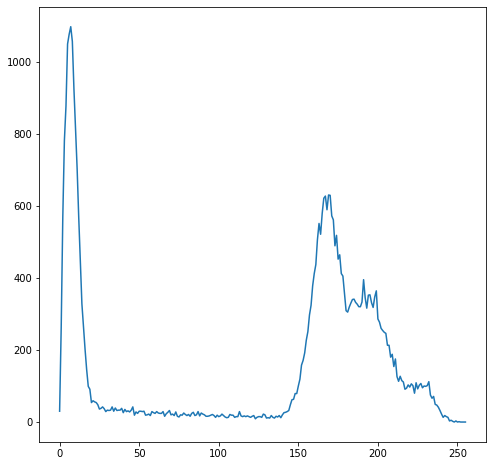

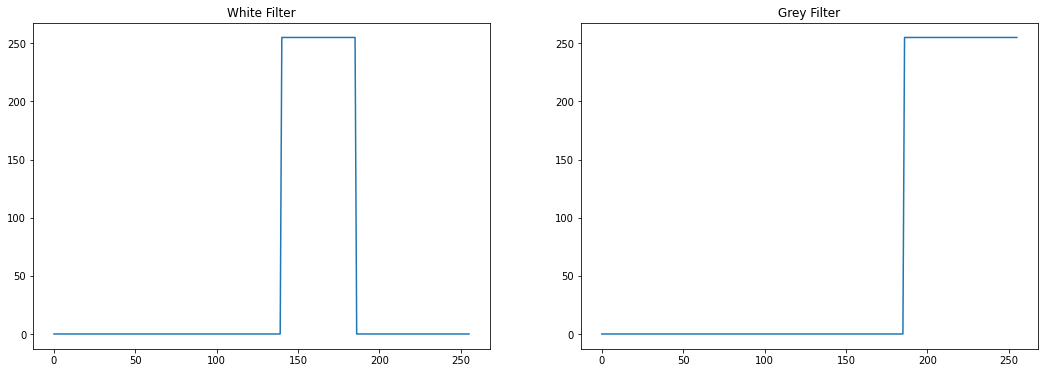

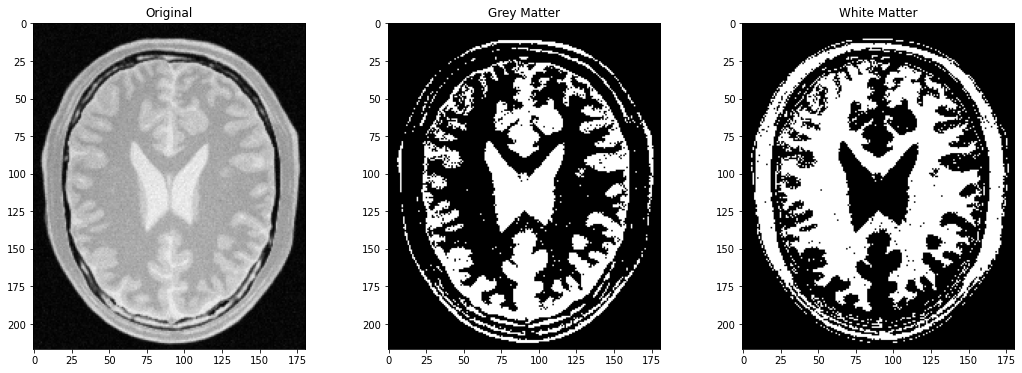

In [3]:
#Question 02
img = cv.imread('images/brain_proton_density_slice.png')
assert img is not None

hist_f = cv.calcHist([img], [0], None, [256], [0,256])
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(hist_f)

fig, ax = plt.subplots( 1, 2, figsize = (18, 6))
index = np.linspace(0, 255, 256, endpoint= True).astype(np.uint8)

grey_1 = np.linspace(0, 0, 186, endpoint= True)
grey_2 = np.linspace(255, 255, 70, endpoint= True)
grey = np.concatenate((grey_1, grey_2), axis = 0).astype(np.uint8)

white_1 = np.linspace(0, 0, 140, endpoint= True)
white_2 = np.linspace(255, 255, 46, endpoint= True)
white_3 = np.linspace(0, 0, 70, endpoint= True)
white = np.concatenate((white_1, white_2, white_3), axis = 0).astype(np.uint8)

grey_matter  = cv.LUT(img, grey)
white_matter = cv.LUT(img, white)
# white_matter = cv.LUT()
ax[0].plot(index, white)
ax[0].set_title('White Filter')
ax[1].plot(index, grey)
ax[1].set_title('Grey Filter')

fig, ax = plt.subplots( 1, 3, figsize = (18, 6))
ax[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original')
ax[1].imshow(grey_matter, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Grey Matter')
ax[2].imshow(white_matter, cmap = 'gray', vmin = 0, vmax = 255)
ax[2].set_title('White Matter')

plt.show()

for i in range(3):
    ax[i].axis('off')
plt.show()

[[  7 126 130]
 [  7 126 130]
 [ 12 126 130]
 ...
 [ 18 128 132]
 [ 23 126 134]
 [ 26 126 135]]
(480, 720, 3)
(480, 720)


Text(0.5, 1.0, 'Gamma Corrected')

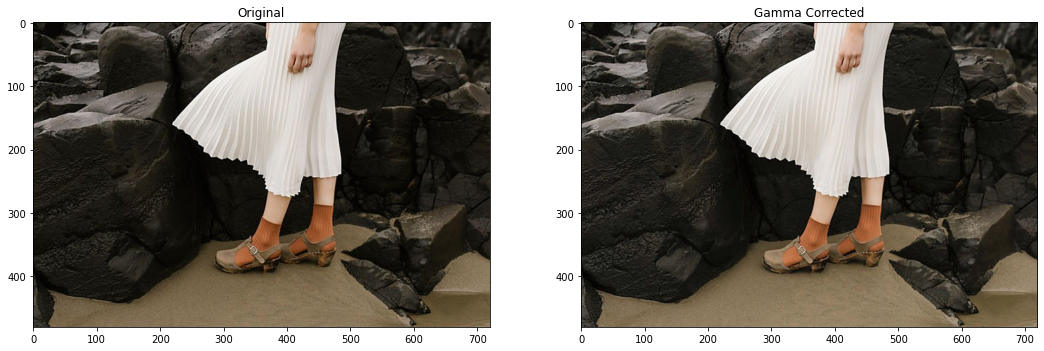

In [4]:
#Question 03
img = cv.imread('images/highlights_and_shadows.jpg')
assert img is not None

lab_img = cv.cvtColor(img, cv.COLOR_BGR2LAB)

gamma = 1/1.14

t = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
print(lab_img[0, :, :])
lab_img[:, :, 0] = cv.LUT(lab_img[:, :, 0],t)

print(lab_img.shape)

print(lab_img[:, :, 0].shape)

gamma_img = cv.cvtColor(lab_img, cv.COLOR_Lab2RGB)


fig, ax = plt.subplots(1, 2, figsize = (18, 6))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[1].imshow(gamma_img)
ax[1].set_title('Gamma Corrected')



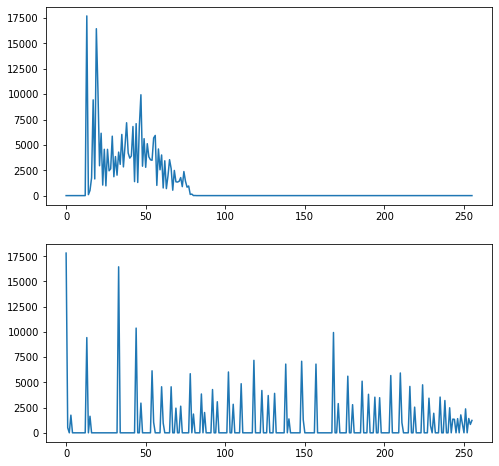

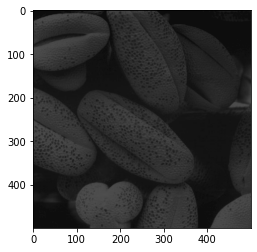

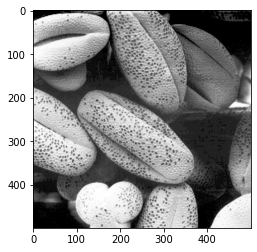

In [5]:
#Question 04
f = cv.imread('images/shells.png' , cv.IMREAD_GRAYSCALE)
assert img is not None

hist_f = cv.calcHist([f], [0], None, [256], [0,256])
g = cv.equalizeHist(f)
hist_g = cv.calcHist([g], [0], None, [256], [0,256])

fig, ax = plt.subplots(2, 1, figsize=(8,8))

ax[0].plot(hist_f)
ax[1].plot(hist_g)

fig, ax = plt.subplots(1, 1)
plt.imshow(cv.cvtColor(f, cv.COLOR_BGR2RGB))

fig, ax = plt.subplots(1, 1)
plt.imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))

In [6]:
#Question 04
f = cv.imread('images/shells.png' , cv.IMREAD_GRAYSCALE)
assert img is not None

print(f.shape)

g = f.flatten()
g = g[:, np.newaxis]
print(g)

(unique, counts) = np.unique(g, return_counts=True)
frequencies = np.asarray((unique, counts)).T

lookup_table = np.zeros((256))

for i in range(256):
    lookup_table[i] = np.sum(frequencies, axis = 0, where = freque)

print(frequencies.shape)

(500, 500)
[[13]
 [13]
 [13]
 ...
 [55]
 [55]
 [49]]


NameError: name 'freque' is not defined

(270, 480, 3)
(1080, 1920, 3)


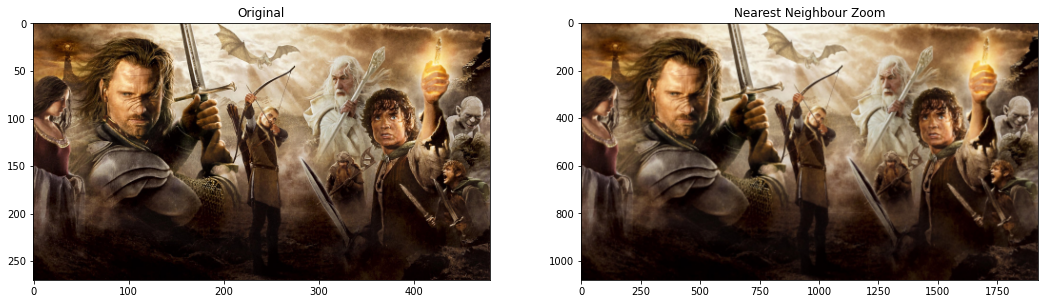

In [32]:
#Question 05

img = cv.imread('images/a1q5images/im01small.png')
assert img is not None

def zoom(img, scaling_factor, mode = "nearest_neighbour"):

    print(img.shape)

    rows = round(img.shape[0] * scaling_factor)
    cols = round(img.shape[1] * scaling_factor)

    zoomed_img = np.zeros((rows, cols, 3))
    print(zoomed_img.shape)

    if ( mode == "nearest_neighbour"):
        for row in range(rows):
            for col in range(cols):
                src_row = round(row/scaling_factor)
                src_col = round(col/scaling_factor)

                if (src_row > img.shape[0] - 1):
                    src_row = img.shape[0] - 1
                if (src_col > img.shape[1] - 1): 
                    src_col = img.shape[1] - 1


                zoomed_img[row, col] = img[ src_row, src_col] 
        
    
    elif ( mode == "bilinear"):
        for row in range(rows):
            for col in range(cols):
                row_pos = row/scaling_factor
                col_pos = col/scaling_factor
                src_row_top     = int(row_pos) 
                src_row_bottom  = src_row_top + 1
                src_col_left    = int(col_pos)
                src_col_right   = src_col_left + 1
        
                if (src_row_bottom > img.shape[0] - 1):
                    src_row_bottom = img.shape[0] - 1
                if (src_col_right > img.shape[1] - 1): 
                    src_col_right = img.shape[1] - 1


                row_division = ( row_pos - src_row_top, 1 - (row_pos - src_row_top))
                col_division = ( col_pos - src_col_left, 1 - (col_pos - src_col_left))

                row_intermediate_left  = img[src_row_top, src_col_left]*row_division[1]  + img[src_row_bottom, src_col_left]*row_division[0]
                row_intermediate_right = img[src_row_top, src_col_right]*row_division[1]  + img[src_row_bottom, src_col_right]*row_division[0]

                zoomed_img[row, col] = row_intermediate_left*col_division[1] + row_intermediate_right*col_division[0]

    zoomed_img = zoomed_img.astype(np.uint8)

    return zoomed_img

zoomed_img = zoom(img, 4, "bilinear")

fig, ax = plt.subplots( 1, 2, figsize = (18, 6))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[1].imshow(cv.cvtColor(zoomed_img, cv.COLOR_BGR2RGB))
ax[1].set_title('Nearest Neighbour Zoom')

plt.show()


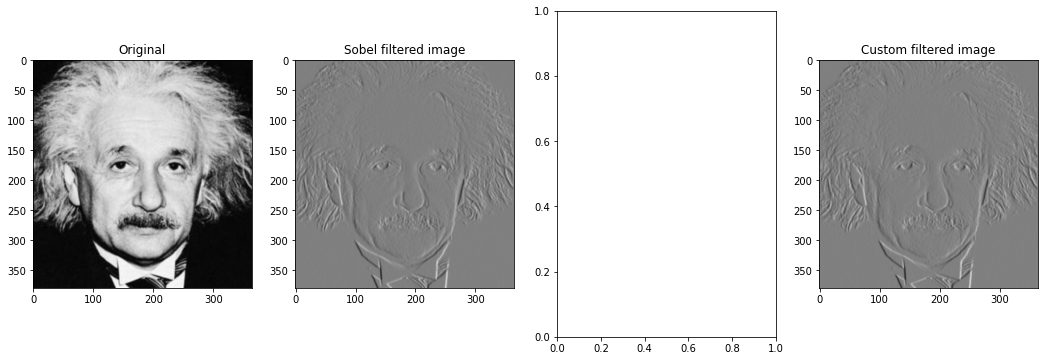

In [ ]:
#Question 06
img = cv.imread('images/einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

sobel_filter = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype = np.float32)

sobel_img = cv.filter2D(img, -1, sobel_filter)

fig, ax = plt.subplots( 1, 4, figsize = (18, 6))
ax[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original')
ax[1].imshow(sobel_img, cmap = 'gray', vmin = -1020, vmax = 1020)
ax[1].set_title('Sobel filtered image')

#Custom Code for Soble Filtering 

def sobelFilter(img):
        sobel_filter = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype = np.float32)
        sobel_filter = np.flipud(np.fliplr(sobel_filter))

        row_size = img.shape[0]
        column_size = img.shape[1]

        output = np.zeros(img.shape, dtype = np.float32 )
        print(img.shape)
        padded_img = np.pad(img, 1, 'constant')
        print(padded_img.shape)

        for y in range(img.shape[1]):

                for x in range(img.shape[0]):
                        print(x, y)
                        output[x, y] = (sobel_filter * padded_img[x: x + 3, y: y + 3]).sum()

        return output
        

# custom_filtered_img = sobelFilter(img)

# ax[2].imshow(custom_filtered_img, cmap = 'gray', vmin = -1020, vmax = 1020)
# ax[2].set_title('Custom filtered image')


sobel_row_filter = np.array([1, 0, -1], dtype = np.float32)
sobel_column_filter = np.array([1, 2, 1], dtype = np.float32)

seperable_filtered_img = cv.sepFilter2D(img, -1, sobel_row_filter, sobel_column_filter)
ax[3].imshow(seperable_filtered_img, cmap = 'gray', vmin = -1020, vmax = 1020)
ax[3].set_title('Custom filtered image')

plt.show()



(841, 561, 3)
0 255
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 2 3]
[0 2 3]


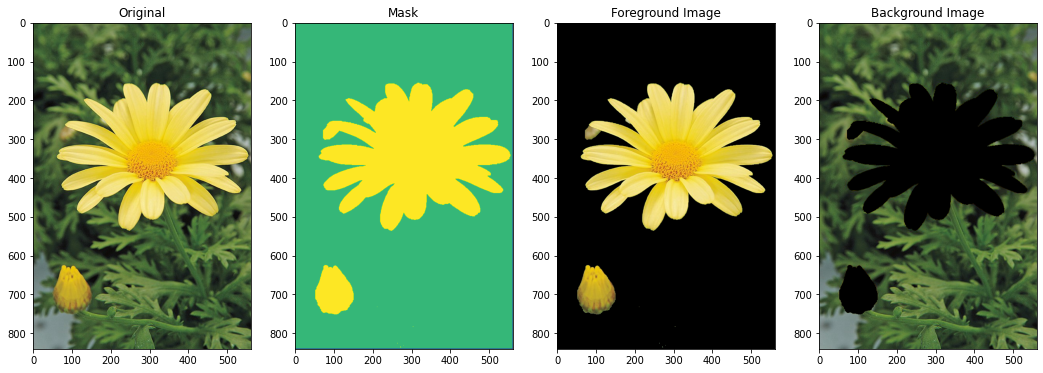

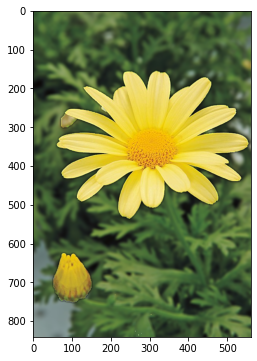

In [ ]:
#Question 07

img = cv.imread('images/daisy.jpg')
assert img is not None

print(img.shape)
print(np.min(img), np.max(img))

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
#rect = (50, 100, 510, 480)
rect = (0, 0, 560, 840)
mask = np.zeros(img.shape[:2],np.uint8)

print(mask)

cv.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

print(np.unique(mask)) 
foreground = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
foreground_img = img*foreground[:,:,np.newaxis]
print(np.unique(mask)) 
background = np.where((mask==3)|(mask==1), 0, 1).astype('uint8')
background_img = img*background[:,:,np.newaxis]

fig, ax = plt.subplots( 1, 4, figsize = (18, 6))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[1].imshow(mask)
ax[1].set_title('Mask')
ax[2].imshow(cv.cvtColor(foreground_img, cv.COLOR_BGR2RGB))
ax[2].set_title('Foreground Image')
ax[3].imshow(cv.cvtColor(background_img, cv.COLOR_BGR2RGB))
ax[3].set_title('Background Image')
plt.show()

#Enhancing the image
k_size = 9
sigma  = 4
blurred_background = cv.GaussianBlur(background_img, (k_size, k_size), sigma)
enhanced_image = cv.bitwise_or(blurred_background, foreground_img)

fig, ax = plt.subplots(1, 1, figsize=(18,6))
ax.imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB))
plt.show()







In [31]:
a = [100, 120, 111]
b = np.array(a)
b = b[:, np.newaxis]
b = b*0.1
print(b)
b.shape


[[10. ]
 [12. ]
 [11.1]]


(3, 1)